In [1]:
import numpy as np
import scipy.special
import math
import matplotlib.pyplot
%matplotlib inline

## mijn neuralNetwork

In [2]:
class neuralNetwork:
    # make your Own Neural Netwrok
    def __init__(self, inputnodes,hiddennodes, outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        print('did that layer')


        pass
    #pp 139
    def train(self,inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T,output_errors)

        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                     np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs  * (1.0 - hidden_outputs)),
                                     np.transpose(inputs))

        pass
    #The query() function takes  the input to a neural network and returns the network’s output.
    def query(self,inputs_list):
        # sigmoid
        # set to 2 array input
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


#pp 133

In [3]:
samples_list = [ ]

In [4]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)


did that layer


In [5]:
training_data_file = open("../data_sets/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
#add the test data voor netwerk
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list[1:]:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)
        pass
    pass

In [7]:
test_data_file = open("../data_sets/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

['9', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '38', '122', '246', '255', '255', '245', '121', '8', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

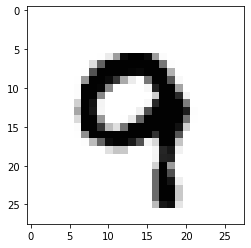

In [8]:
all_values = test_data_list[100].split(',')
print(all_values)
array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(array,cmap='Greys',interpolation='None')

In [9]:
scorecard = []

# go through all the records in the test data set
for record in test_data_list[1:]:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

    pass

In [10]:
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.972
